# FPE Integration: 2D

This notebook generates simple visualization in low-state number systems to visualize the initialization of the integration matrices for each of the relevant boundary conditions.

In [34]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='hls')

from FPE.integrator_2D import FPE_integrator_2D
from FPE.Integrator import FPE_Integrator_1D

proj_dir = Path().resolve().parents[0]
plot_dir = proj_dir / 'figures' / 'reports'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Initialize constants so that alpha = 1.0

D = 2.0
dx = 1.0
dy = 1.0
dt = 1.0

z_array = np.linspace(0, 1, 4)

In [4]:
fpe_2d_open = FPE_integrator_2D(D, dt, dx, dy, z_array, z_array, boundaryCond='open')
fpe_1d_open = FPE_Integrator_1D(D, dt, dx, z_array, boundaryCond='open')

<AxesSubplot:>

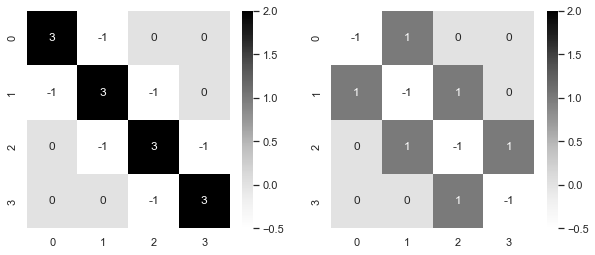

In [5]:
# First lets look at the 1D A-matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(fpe_1d_open.AMat, cmap="Greys", ax=ax[0], annot=True, annot_kws={'fontsize': 12}, vmax=2, vmin=-0.5)
sns.heatmap(fpe_1d_open.BMat, cmap="Greys", ax=ax[1], annot=True, annot_kws={'fontsize': 12}, vmax=2, vmin=-0.5)


<AxesSubplot:>

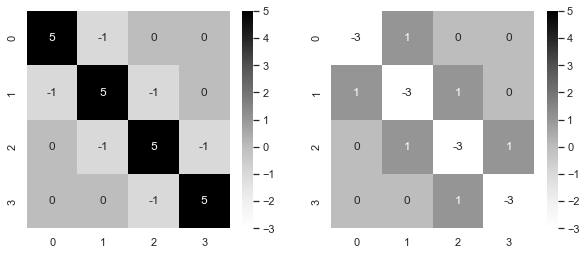

In [6]:
# And now for the first block of the 2d A and B matrices

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(fpe_2d_open.AMat.toarray()[4:8, 4:8], cmap='Greys', ax=ax[0], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-3)
sns.heatmap(fpe_2d_open.BMat.toarray()[4:8, 4:8], cmap='Greys', ax=ax[1], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-3)



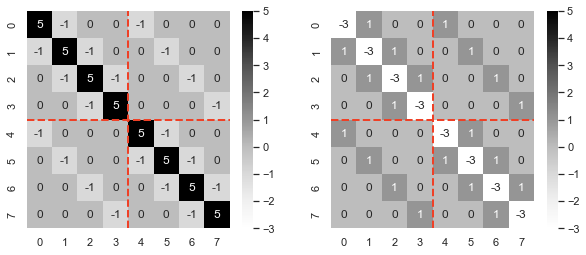

In [7]:
# And then we can look at the first two blocks of the 2D system, which could show some of the additional Y-trasition elements, as well as the behaviour around block interfaces

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(fpe_2d_open.AMat.toarray()[:8, :8], cmap='Greys', ax=ax[0], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-3)
sns.heatmap(fpe_2d_open.BMat.toarray()[:8, :8], cmap='Greys', ax=ax[1], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-3)
ax[0].axvline(4, linestyle='--', color=sns.xkcd_rgb["tomato"], linewidth=2.0)
ax[0].axhline(4, linestyle='--', color=sns.xkcd_rgb["tomato"], linewidth=2.0)

ax[1].axvline(4, linestyle='--', color=sns.xkcd_rgb["tomato"], linewidth=2.0)
ax[1].axhline(4, linestyle='--', color=sns.xkcd_rgb["tomato"], linewidth=2.0)



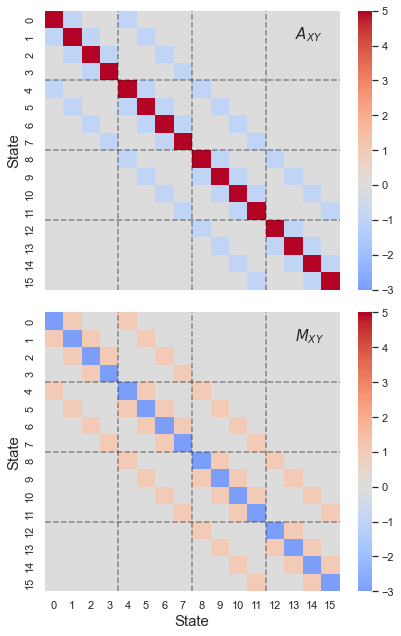

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(6, 9), sharex=True, sharey=True)

sns.heatmap(fpe_2d_open.AMat.toarray(), cmap='coolwarm', ax=ax[0], annot=False, annot_kws={'fontsize': 12}, vmax=5, vmin=-3, center=0)
sns.heatmap(fpe_2d_open.BMat.toarray(), cmap='coolwarm', ax=ax[1], annot=False, annot_kws={'fontsize': 12}, vmax=5, vmin=-3, center=0)
ax[0].axvline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axvline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axvline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[0].axhline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axhline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axhline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[1].axvline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axvline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axvline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[1].axhline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axhline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axhline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[0].set_ylabel(r"State", fontsize=15)
ax[1].set_ylabel(r"State", fontsize=15)
ax[1].set_xlabel(r"State", fontsize=15)

ax[0].annotate(r"$A_{XY}$", xy=(0.85, 0.9), xycoords="axes fraction", fontsize=15)
ax[1].annotate(r"$M_{XY}$", xy=(0.85, 0.9), xycoords="axes fraction", fontsize=15)

plt.tight_layout()
plt.savefig(plot_dir / "2d-matrix-sample.pdf")
plt.show()

In [40]:
fpe_2d_per = FPE_integrator_2D(D, dt, dx, dy, z_array, z_array, boundaryCond='periodic')
fpe_1d_per = FPE_Integrator_1D(D, dt, dx, z_array, boundaryCond='periodic')

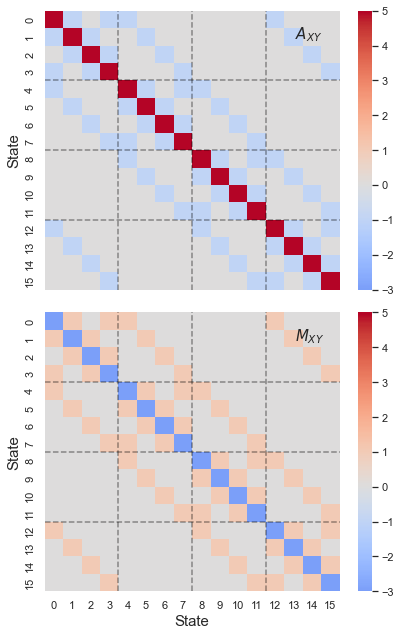

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(6, 9), sharex=True, sharey=True)

sns.heatmap(fpe_2d_per.AMat.toarray(), cmap='coolwarm', ax=ax[0], annot=False, annot_kws={'fontsize': 12}, vmax=5, vmin=-3, center=0)
sns.heatmap(fpe_2d_per.BMat.toarray(), cmap='coolwarm', ax=ax[1], annot=False, annot_kws={'fontsize': 12}, vmax=5, vmin=-3, center=0)
ax[0].axvline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axvline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axvline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[0].axhline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axhline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[0].axhline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[1].axvline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axvline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axvline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[1].axhline(4, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axhline(8, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)
ax[1].axhline(12, linestyle='--', color=sns.xkcd_rgb["black"], linewidth=1.5, alpha=0.4)

ax[0].set_ylabel(r"State", fontsize=15)
ax[1].set_ylabel(r"State", fontsize=15)
ax[1].set_xlabel(r"State", fontsize=15)

ax[0].annotate(r"$A_{XY}$", xy=(0.85, 0.9), xycoords="axes fraction", fontsize=15)
ax[1].annotate(r"$M_{XY}$", xy=(0.85, 0.9), xycoords="axes fraction", fontsize=15)

plt.tight_layout()
plt.savefig(plot_dir / "2d-matrix-sample-periodic.pdf")
plt.show()

In [8]:
# Now lets look at HW conditions
fpe_2d_hard = FPE_integrator_2D(D, dt, dx, dy, z_array, z_array, boundaryCond='hard-wall')
fpe_1d_hard = FPE_Integrator_1D(D, dt, dx, z_array, boundaryCond='hard-wall')

<AxesSubplot:>

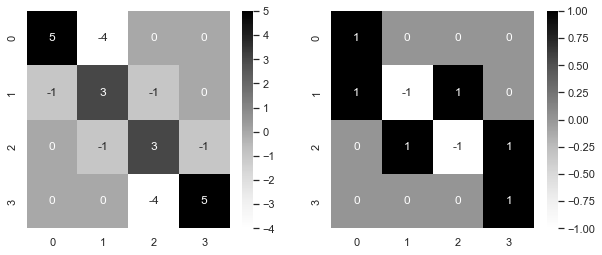

In [9]:
# 1D matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(fpe_1d_hard.AMat, cmap='Greys', ax=ax[0], annot=True, annot_kws={'fontsize': 12})
sns.heatmap(fpe_1d_hard.BMat, cmap='Greys', ax=ax[1], annot=True, annot_kws={'fontsize': 12})


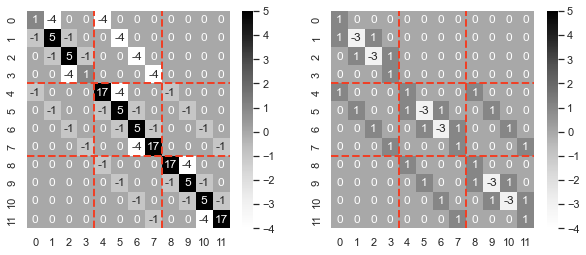

In [15]:
# @D matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(fpe_2d_hard.AMat.toarray()[:12, :12], cmap='Greys', ax=ax[0], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-4)
sns.heatmap(fpe_2d_hard.BMat.toarray()[:12, :12], cmap='Greys', ax=ax[1], annot=True, annot_kws={'fontsize': 12}, vmax=5, vmin=-4)

ax[0].axhline(4, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])
ax[0].axhline(8, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])

ax[0].axvline(4, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])
ax[0].axvline(8, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])

ax[1].axhline(4, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])
ax[1].axhline(8, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])

ax[1].axvline(4, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])
ax[1].axvline(8, linestyle='--', linewidth=2.0, color=sns.xkcd_rgb['tomato'])

plt.show()